In [1]:
import pandas as pd
import os

from fastai.vision.all import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Download the data
path = untar_data(URLs.PETS)/'images'

# Data is downloaded here - C:\Users\.fastai\data

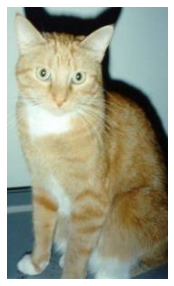

In [3]:
# get all the image paths
img_paths = path.ls()

# Define a utility function to display the image given its path
def show_image(img_path):
    img = PILImage.create(img_path)
    img.show()
    
# Display some random images
show_image(img_paths[100])
# show_image(img_paths[1242])

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


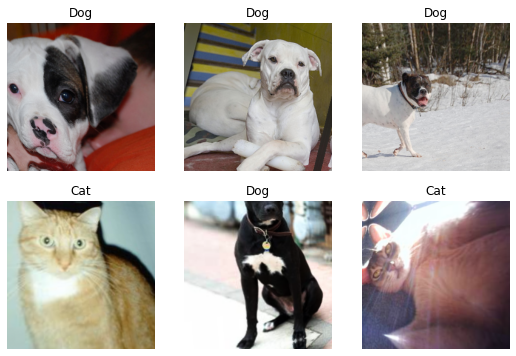

In [4]:
# Define the function to return the label
def is_cat(x):
    if x.name[0].isupper():
        return 'Cat'
    else:
        return 'Dog'
        
# Define the datablock called pets
pets = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = is_cat,
    splitter = RandomSplitter(valid_pct=0.25, seed=42),
    item_tfms = Resize(420),
    batch_tfms = aug_transforms(size = 244, mult=1.5)
)

# Define the dataloaders from the pets datablock
dls = pets.dataloaders(path)

# Show some images from the dataloader
dls.show_batch(max_n = 6)

SuggestedLRs(valley=0.0006918309954926372)

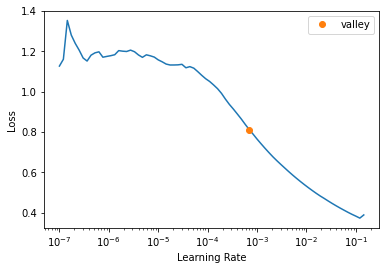

In [5]:
# Define the model using cnn_learner
learn = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])

# Find the optimal lr using lr_find()
learn.lr_find()

In [6]:
# fine tune the model with learning rate and some freeze epochs 
learn.fine_tune(2, base_lr=3e-3, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.817319,0.068662,0.974790,0.025210,01:57
1,0.450776,0.000933,1.000000,0.000000,02:00
2,0.294743,0.000183,1.000000,0.000000,01:56


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.039721,0.001819,1.000000,0.000000,02:34
1,0.034119,0.006902,0.991597,0.008403,02:40


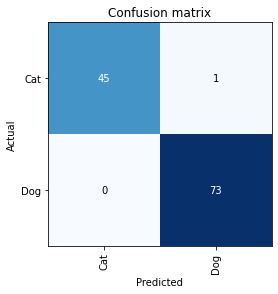

In [7]:
# create the interepreation object from our model
interep = ClassificationInterpretation.from_learner(learn)

# Plot the confusion matrix
interep.plot_confusion_matrix()

In [8]:
# Export our trained model in form of pickle file
learn.export(fname='./models/pets_classifier.pkl')

('Cat', tensor(0), tensor([1.0000e+00, 4.5416e-10]))

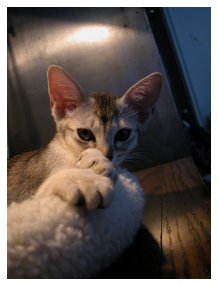

In [10]:
# load the model from pickle file 
load_inf = load_learner('./models/pets_classifier.pkl')

# Perform some predictions from random images 
img1 = img_paths[1]
show_image(img1)
load_inf.predict(img1)